In [1]:
# IMport Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

import os


import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
import pickle 

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [3]:
dir_path = '../img/digits'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes (letters and digits): ', NUM_CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes (letters and digits):  35


In [4]:
digits_counter = {}
NUM_IMAGES = 0

for digit in digits:
    path = os.path.join(dir_path, digit)
    digits_counter[digit] = len(os.listdir(path))
    NUM_IMAGES += len(os.listdir(path))

print(digits_counter)
print('Number of all images: ', NUM_IMAGES)

{'0': 1030, '1': 1030, '2': 1030, '3': 1030, '4': 1030, '5': 1030, '6': 1030, '7': 1030, '8': 1030, '9': 1030, 'A': 1010, 'B': 1030, 'C': 1020, 'D': 1010, 'E': 1010, 'F': 1020, 'G': 1020, 'H': 1020, 'I': 1010, 'J': 1030, 'K': 1010, 'L': 1010, 'M': 1020, 'N': 1020, 'P': 1010, 'Q': 1010, 'R': 1020, 'S': 1020, 'T': 1020, 'U': 1010, 'V': 1030, 'W': 1010, 'X': 1010, 'Y': 1010, 'Z': 810}
Number of all images:  35500


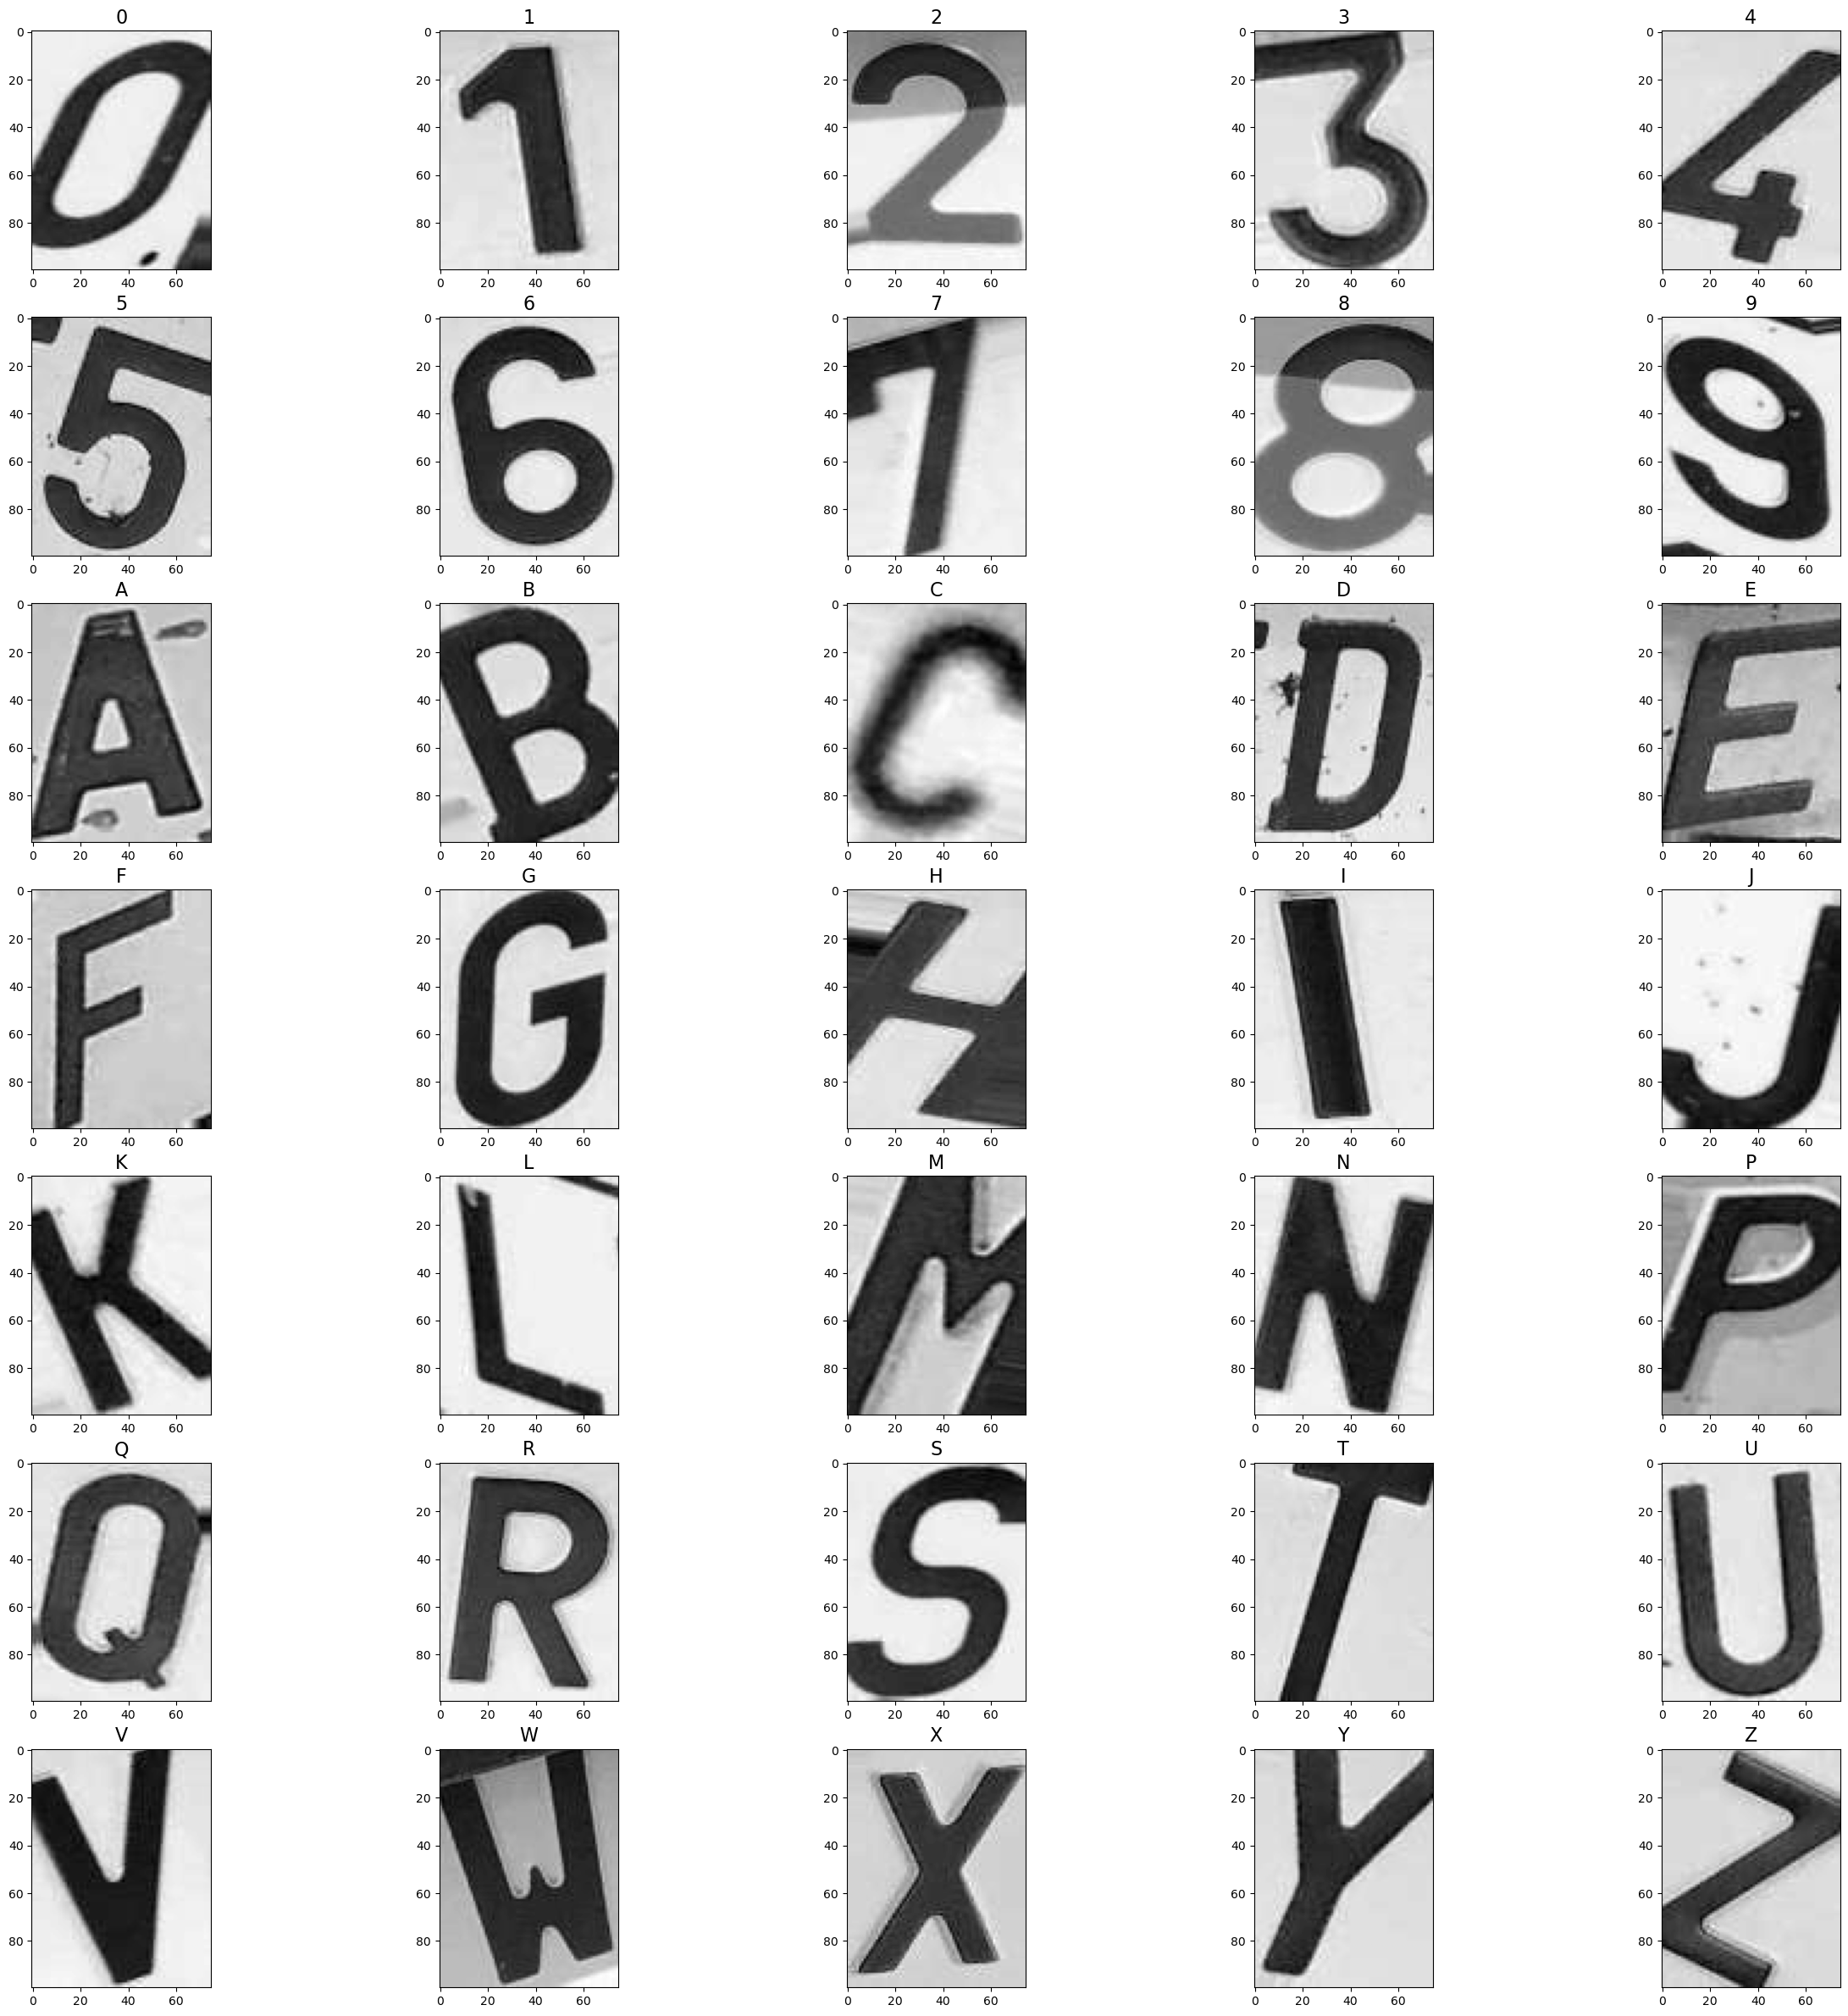

In [5]:
rows, columns = 7, 5

k = 0
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))
for row in range(rows):
    for column in range(columns):
        rand_num = np.random.randint(0, digits_counter[digits[k]])
        class_path = dir_path + '/' + str(digits[k])
        image_path = class_path + '/' + str(os.listdir(class_path)[rand_num])
        ax = axes[row, column]
        ax.set_title(digits[k], loc='center', fontsize=16)
        ax.imshow(imread(image_path), cmap='gray')
        k += 1
plt.show()

# Loading data into numpy arrays

In [6]:
data = []
labels = []
MAX_NUM = None   # maximum number of digits images per class
IMG_WIDTH, IMG_HEIGHT = 32, 40

# images of digits '6' in folder with '2'
incorrect_img = [
    'aug20121_0.jpg',
    'aug20122_1.jpg',
    'aug20123_2.jpg',
    'aug20124_3.jpg',
    'aug20125_4.jpg',
    'aug20126_5.jpg',
    'aug20127_6.jpg',
    'aug20128_7.jpg',
    'aug20129_8.jpg',
    'aug20130_9.jpg'
]

for digit in digits:
    path = os.path.join(dir_path, digit)
    label = digits.index(digit)
    for img in os.listdir(path):
        if img in incorrect_img:
            continue
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        resized = cv.resize(img_array, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)        
        data.append(gray)
        labels.append(label)
        if MAX_NUM is not None:
            if labels.count(label) == MAX_NUM:
                break

data = np.array(data, dtype='float32')
labels = np.array(labels, dtype='int8')

In [7]:
print(data.shape)

(35490, 40, 32)


In [8]:
data = data / 255.0
data = data.reshape(*data.shape, 1)
labels = to_categorical(labels, num_classes=NUM_CLASSES)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.3)

print("Training dataset shape: ", X_train.shape, y_train.shape)
print("Validation dataset shape: ", X_val.shape, y_val.shape)
print("Testing dataset shape: ", X_test.shape, y_test.shape)

Training dataset shape:  (17390, 40, 32, 1) (17390, 35)
Validation dataset shape:  (7453, 40, 32, 1) (7453, 35)
Testing dataset shape:  (10647, 40, 32, 1) (10647, 35)


# Training Neural Network

In [31]:
model = tf.keras.Sequential([
    Flatten(input_shape=(40, 32, 1)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(35,activation='softmax')
])

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train,
                    epochs=100, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/100


68/68 [==============================] - 2s 15ms/step - loss: 3.0849 - accuracy: 0.2019 - val_loss: 3.3346 - val_accuracy: 0.2740
Epoch 2/100
68/68 [==============================] - 1s 11ms/step - loss: 2.1137 - accuracy: 0.5377 - val_loss: 2.9106 - val_accuracy: 0.5042
Epoch 3/100
68/68 [==============================] - 1s 13ms/step - loss: 1.5623 - accuracy: 0.6899 - val_loss: 2.3212 - val_accuracy: 0.6707
Epoch 4/100
68/68 [==============================] - 1s 19ms/step - loss: 1.1863 - accuracy: 0.7937 - val_loss: 1.6246 - val_accuracy: 0.7916
Epoch 5/100
68/68 [==============================] - 1s 22ms/step - loss: 0.9169 - accuracy: 0.8520 - val_loss: 1.1095 - val_accuracy: 0.8540
Epoch 6/100
68/68 [==============================] - 1s 15ms/step - loss: 0.7227 - accuracy: 0.8844 - val_loss: 0.8427 - val_accuracy: 0.8755
Epoch 7/100
68/68 [==============================] - 1s 15ms/step - loss: 0.5851 - accuracy: 0.9040 - val_loss: 0.6251 - val_accuracy: 0.8970
Epoch 8/100
68/68 

# Training Curve for NN

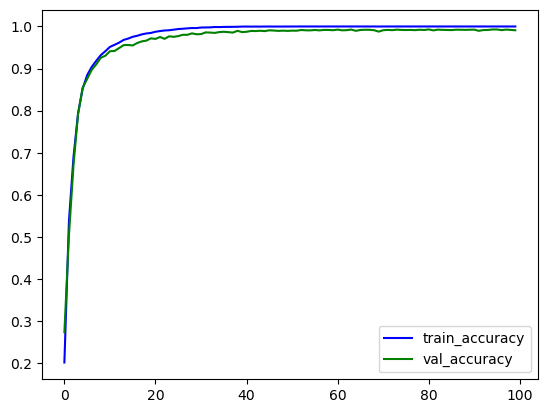

In [34]:
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [35]:
model.evaluate(X_val,y_val)

233/233 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9910


[0.029995296150445938, 0.991010308265686]

In [36]:
model.evaluate(X_test,y_test)

333/333 [==============================] - 1s 3ms/step - loss: 0.0300 - accuracy: 0.9923


[0.029995230957865715, 0.9922983050346375]

In [44]:
model.save('saved_models/model_nn.h5')

# Convolution Neural Nets

In [37]:
input_layer=Input(shape=(40,32,1))
layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(35,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40, 32, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 30, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 37, 29, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_13 (Bat  (None, 37, 29, 16)       64        
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 17168)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                1098

In [38]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [39]:
history2 = model2.fit(X_train, y_train,
                    epochs=100, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/100


68/68 [==============================] - 9s 123ms/step - loss: 2.4021 - accuracy: 0.4388 - val_loss: 3.4000 - val_accuracy: 0.1128
Epoch 2/100
68/68 [==============================] - 8s 122ms/step - loss: 1.5693 - accuracy: 0.7645 - val_loss: 3.2692 - val_accuracy: 0.1339
Epoch 3/100
68/68 [==============================] - 8s 113ms/step - loss: 1.1751 - accuracy: 0.8731 - val_loss: 3.0900 - val_accuracy: 0.2061
Epoch 4/100
68/68 [==============================] - 7s 106ms/step - loss: 0.8917 - accuracy: 0.9254 - val_loss: 2.8171 - val_accuracy: 0.3828
Epoch 5/100
68/68 [==============================] - 7s 110ms/step - loss: 0.6808 - accuracy: 0.9576 - val_loss: 2.4603 - val_accuracy: 0.5791
Epoch 6/100
68/68 [==============================] - 7s 106ms/step - loss: 0.5247 - accuracy: 0.9765 - val_loss: 2.0100 - val_accuracy: 0.7675
Epoch 7/100
68/68 [==============================] - 7s 108ms/step - loss: 0.4080 - accuracy: 0.9859 - val_loss: 1.5090 - val_accuracy: 0.8877
Epoch 8/100

# Training curve for CNN

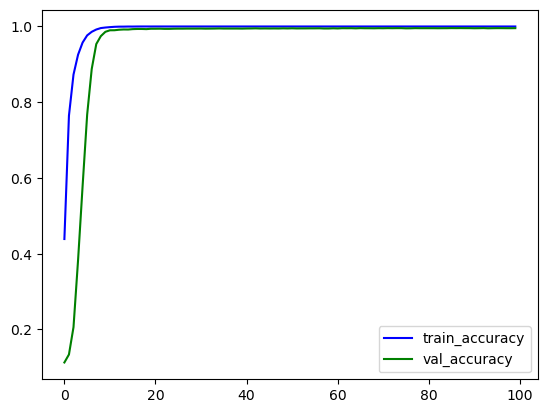

In [40]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [41]:
model2.evaluate(X_val,y_val)

233/233 [==============================] - 2s 8ms/step - loss: 0.0254 - accuracy: 0.9956


[0.02541579119861126, 0.9955722689628601]

In [42]:
model2.evaluate(X_test,y_test)

333/333 [==============================] - 3s 8ms/step - loss: 0.0254 - accuracy: 0.9937


[0.025387082248926163, 0.9937071204185486]

In [43]:
model2.save('saved_models/model_cnn.h5')